# Study 1 Plasma Stream

In [26]:
import import_ipynb
from run import Run
from constants import Constants
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
constants = Constants()

In [3]:
# Create a run object instance
s1 = Run()

In [4]:
# Create 100 Hydrogen ions whose:
# speeds are Maxwellian sampled, velocity directions are uniform randomly sampled
# positions are all sampled such that particles start at [-0.5, 0, 0] 
# a chamber 1m x 1m x 1m with extreme points [-0.5, -0.5, -0.5] and [0.5, 0.5, 0.5] considered
s1.create_batch_with_file_initialization('H+', constants.constants['e'][0],\
                                          constants.constants['m_H'][0] * constants.constants['amu'][0], \
                                          100, 100, 'H ions', r_index=0, v_index=1)

In [5]:
# First batch of particles
s1_batch1 = s1.batches[0]['H ions']

In [6]:
E_scale = [0, 0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5]
B_scale = [1 for i in range(len(E_scale))]

# NOT THIS NOW EB_scale = [(i, j) for i in range(10) for j in range(10)] # list of tuples (0,0) ... (9,9)

s1_index_update = 0 # Update the first batch in this Run instance 
s1_particle_track_indices = [i for i in range(100)] # Track all 100 particles
s1_dT = 10**(-7) # 0.1 microseconds
s1_stepT = 10**(-9) # 0.001 microseconds time step
s1_E0 = 1000 # say 1000 Volts (voltage) per meter (size of chamber) 
s1_Edirn = [1,0,0] #in the x-direction [1,0,0]
s1_B0 = 10 * (10**(-3)) # Meant to say 10 mT 
s1_Bdirn = [0,1,0] #in the y-direction [0,1,0]
s1_argsE = [element * s1_E0 for element in s1_Edirn] # currently the uniform_E_field configuration is used
s1_argsB = [element * s1_B0 for element in s1_Bdirn]# currently the uniform_B_field configuration is used

s1_batch_ps_and_vs = dict()

for i in range(len(E_scale)):
    desc = 'E_scale = ' + str(E_scale[i]) + ' ' + 'B_scale = ' + str(B_scale[i])
    s1_batch1_ps_and_vs_once = s1.update_batch_with_unchanging_fields\
    (s1_index_update, s1_dT, s1_stepT, [elem *E_scale[i] for elem in s1_argsE], [elem *E_scale[i] for elem in s1_argsB] * B_scale[i], s1_particle_track_indices)
    s1_batch_ps_and_vs[desc] = s1_batch1_ps_and_vs_once

'''
s1_batch_ps_and_vs will be of the form : 
{ 
    'E_scale = 0 B_scale = 1': {
                                    0 (means 0th particle): [
                                                                (0 (means 0th timestep), array of position, array of velocity)
                                    ] 
    }
}

so it is a dictionary whose keys are strings describing the E and B field scales and
values are particles update history which is:
    a dictionary whose keys are intergers representing particles and values are update history for that particle
    which is:
        list of tuples (time step, position, velocity)
'''

"\ns1_batch_ps_and_vs will be of the form : \n{ \n    'E_scale = 0 B_scale = 1': {\n                                    0 (means 0th particle): [\n                                                                (0 (means 0th timestep), array of position, array of velocity)\n                                    ] \n    }\n}\n\nso it is a dictionary whose keys are strings describing the E and B field scales and\nvalues are particles update history which is:\n    a dictionary whose keys are intergers representing particles and values are update history for that particle\n    which is:\n        list of tuples (time step, position, velocity)\n"

In [7]:
s1_descE_is_1 = 'E_scale = ' + str(E_scale[2]) + ' ' + 'B_scale = ' + str(B_scale[2])
s1_descE_is_n1 = 'E_scale = ' + str(E_scale[3]) + ' ' + 'B_scale = ' + str(B_scale[3])
# Extract update histories for two field configs
s1_histories_E1 = s1_batch_ps_and_vs[s1_descE_is_1]
s1_histories_nE1 = s1_batch_ps_and_vs[s1_descE_is_n1]

In [8]:
# Extract information on 0th particle's update history in both cases
s1_descE_is_1_p0 = s1_histories_E1[0]
s1_descE_is_n1_p0 =  s1_histories_nE1[0]

In [9]:
s1_descE_is_1_p0_ps = []
s1_descE_is_1_p0_vs = []

for i in range(len(s1_descE_is_1_p0)):
    s1_descE_is_1_p0_ps.append(s1_descE_is_1_p0[i][1])
    s1_descE_is_1_p0_vs.append(s1_descE_is_1_p0[i][2])
    
s1_descE_is_n1_p0_ps = []
s1_descE_is_n1_p0_vs = []

for i in range(len(s1_descE_is_n1_p0)):
    s1_descE_is_n1_p0_ps.append(s1_descE_is_n1_p0[i][1])
    s1_descE_is_n1_p0_vs.append(s1_descE_is_n1_p0[i][2])

In [10]:
s1_descE_is_1_p0_ps

[array([-0.49968556, -0.00113892, -0.00056986]),
 array([-0.49968378, -0.00114464, -0.00057272]),
 array([-0.4996819 , -0.00115036, -0.00057558]),
 array([-0.49967993, -0.00115609, -0.00057844]),
 array([-0.49967786, -0.00116181, -0.00058129]),
 array([-0.49967569, -0.00116753, -0.00058415]),
 array([-0.49967342, -0.00117326, -0.000587  ]),
 array([-0.49967105, -0.00117898, -0.00058985]),
 array([-0.49966859, -0.0011847 , -0.00059269]),
 array([-0.49966602, -0.00119043, -0.00059554]),
 array([-0.49966336, -0.00119615, -0.00059838]),
 array([-0.4996606 , -0.00120187, -0.00060122]),
 array([-0.49965774, -0.0012076 , -0.00060405]),
 array([-0.49965478, -0.00121332, -0.00060689]),
 array([-0.49965172, -0.00121904, -0.00060972]),
 array([-0.49964857, -0.00122477, -0.00061254]),
 array([-0.49964532, -0.00123049, -0.00061537]),
 array([-0.49964196, -0.00123621, -0.00061819]),
 array([-0.49963851, -0.00124193, -0.00062101]),
 array([-0.49963497, -0.00124766, -0.00062382]),
 array([-0.49963132,

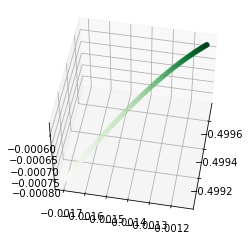

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(50, 10)

# Data for three-dimensional scattered points
zdata = [elem[2] for elem in s1_descE_is_1_p0_ps]
xdata = [elem[0] for elem in s1_descE_is_1_p0_ps]
ydata = [elem[1] for elem in s1_descE_is_1_p0_ps]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

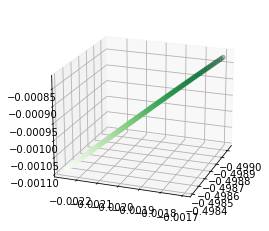

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 20)

# Data for three-dimensional scattered points
zdata = [elem[2] for elem in s1_descE_is_n1_p0_ps]
xdata = [elem[0] for elem in s1_descE_is_n1_p0_ps]
ydata = [elem[1] for elem in s1_descE_is_n1_p0_ps]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [13]:
# Search how to animate matplotlib with numpy arrays and for a particle, animate it's position and velocities
# through different E and B field settings. 

In [23]:
# take for a field configuration
s1_allFieldkeys = list(s1_batch_ps_and_vs.keys())
s1_allfield_p0_ps = []
s1_allfield_p0_vs = []
for akey in s1_allFieldkeys:
    s1_histories = s1_batch_ps_and_vs[akey]
    
    #Take particle 0
    s1_p0 = s1_histories[0]
    
    #Take ps and vs
    for i in range(len(s1_p0)):
        s1_allfield_p0_ps.append(s1_p0[i][1])
        s1_allfield_p0_vs.append(s1_p0[i][2])

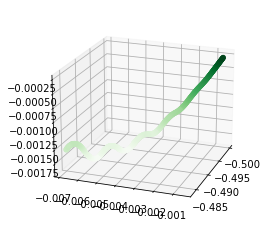

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 20)

# Data for three-dimensional scattered points
zdata = [elem[2] for elem in s1_allfield_p0_ps] # Animate this plot as well.
xdata = [elem[0] for elem in s1_allfield_p0_ps]
ydata = [elem[1] for elem in s1_allfield_p0_ps]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

TypeError: cannot unpack non-iterable Path3DCollection object

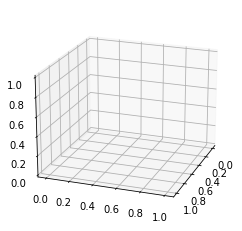

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(20, 20)

xdataPlot, ydataPlot, zdataPlot = [], [], []
ln, = ax.scatter3D(xdataPlot, ydataPlot, zdataPlot, c=zdataPlot, cmap='Greens')

def init():
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.ste_zlim(-1, 1)
    return ln,

def update(frames):
    xvals, yvals, zvals = frames
    for i in range(len(xavls)):
        xdataPlot.append(xvals[i])
        ydataPlot.append(yvals[i])
        zdataPlot.append(zvals[i])
    ln.set_data(xdataPlot, ydataPlot, zdataPlot)
    return ln,

#for i in range:
ani = FuncAnimation(fig, update, frames=(xdata, ydata, zdata),
                    init_func=init, blit=True)
plt.show()

#### Implement other field configurations as well, Helmholtz coil, radial E field;
so that the Electric and Magnetic field strength are around the same values as in the first case

## Need many plots and animations for presentation